### Visualize the NTP performance at different model sparsity settings

In [1]:
import matplotlib.pyplot as plt
import re

In [15]:
datasets = ["stl", "cifar10"]
file_directory = "../../logs/vgg11/"

In [20]:
def extract_floats(s):
    # Regular expression for matching floats
    pattern = r"[-+]?[0-9]*\.?[0-9]+"
    # Find all matches in the string
    matches = re.findall(pattern, s)
    # Convert all matches to float
    floats = [float(match) for match in matches]
    return floats

In [21]:
import numpy as np

def read_file(file_path):
    results = {}
    with open(file_path, "r") as file:
        lines = file.readlines()
        for line in lines:
            if "Data ratio" in line:
                # Get the value after ":"
                line = line.split(":")[2].strip()
                data_ratio = extract_floats(line.split(",")[0].strip())[0]
                data_volume = extract_floats(line.split(",")[1].strip())[0]
                accuracy = extract_floats(line.split(",")[3].strip())[0]
                if data_volume not in results:
                    results[data_volume] = [accuracy]
                else:
                    results[data_volume].append(accuracy)
        for key in results:
            results[key] = np.array(results[key])
        return results

In [34]:
source = 'cifar10'
target = 'stl'
seed = 3
sparsity = [0.5, 0.8, 0.9, 0.95, 0.99]

sparsity_results = {}
for s in sparsity:
    org_path = file_directory + f"lda/{seed}/{s}/admm_" + source + "_to_" + target + ".log"
    org_dic = read_file(org_path)
    print(org_dic)
    sparsity_results[s] = org_dic


{5.0: array([0.1375 , 0.13275]), 10.0: array([0.11775, 0.12175]), 25.0: array([0.1555 , 0.16375]), 40.0: array([0.194375, 0.190625]), 50.0: array([0.223125, 0.22375 ]), 250.0: array([0.431875, 0.41475 ]), 500.0: array([0.583125, 0.588   ]), 1000.0: array([0.618625, 0.618   ]), 2500.0: array([0.656  , 0.66125]), 5000.0: array([0.68975, 0.689  ])}
{5.0: array([0.154375, 0.159875]), 10.0: array([0.140625, 0.13875 ]), 25.0: array([0.235125, 0.248625]), 40.0: array([0.21925 , 0.216625]), 50.0: array([0.245625, 0.24325 ]), 250.0: array([0.36525 , 0.358875]), 500.0: array([0.4995  , 0.484875]), 1000.0: array([0.576625, 0.5685  ]), 2500.0: array([0.647625, 0.64575 ]), 5000.0: array([0.697   , 0.700375])}
{5.0: array([0.142875, 0.142375]), 10.0: array([0.135, 0.134]), 25.0: array([0.171  , 0.17075]), 40.0: array([0.15125, 0.185  ]), 50.0: array([0.18925, 0.1955 ]), 250.0: array([0.24   , 0.24825]), 500.0: array([0.4865, 0.4895]), 1000.0: array([0.591375, 0.582   ]), 2500.0: array([0.6615  , 0.6

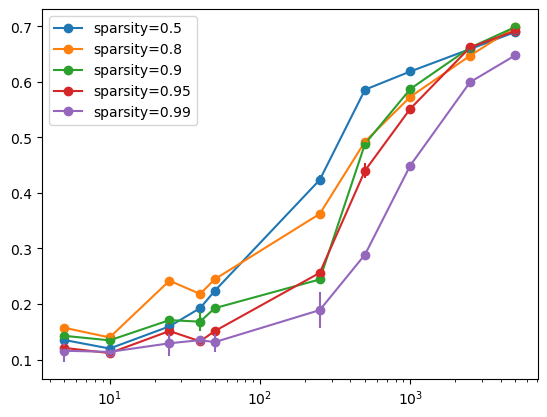

In [37]:
for i, s in enumerate(sparsity_results.keys()):
    dic = sparsity_results[s]
    std = np.std(list(dic.values()), axis=1)
    mean = np.mean(list(dic.values()), axis=1)
    # Set color mapping
    cmap = plt.get_cmap('tab10')
    plt.plot(list(dic.keys()), mean, label=f"sparsity={s}", color=cmap(i), marker="o")
    # Draw the std using the bars
    plt.errorbar(list(dic.keys()), mean, yerr=std, fmt='.', color=cmap(i))

    
# log scale
plt.xscale('log')
plt.legend()